# Simulation of a 2D Ising model by the Metropolis algorithm

## Introduction
The focus of this work centers on the two-dimensional Ising model, a fundamental paradigmatic construct in statistical mechanics. This model will be used to describe the interactions among discrete spins, which can assume two states "spin up" or "spin down," within a two-dimensional lattice. A notable application of the Ising model is in understanding the behavior of spins in materials like ferromagnets.<br>
At sufficiently low temperatures, the system exhibits order, with a predominant alignment of spins. However, when the temperature is high ($T \geq T_c$), thermal fluctuations become significant, leading to the breakdown of order, resulting in a disordered arrangement of spins. <br>
The main goal of this project is to use Monte Carlo simulations to investigate this phase transition.

## 2D Ising Model Overview

The Ising Hamiltonian is described by the equation:

$$
H = -J \sum_{\langle ij \rangle} S_i S_j
$$

In this equation:
  - $S_i$ represents spins that can have values of ±1.
  -  The notation $\langle ij \rangle$ denotes nearest-neighbor interactions only.
  -  $J > 0$ represents the strength of the exchange interaction.

The system undergoes a second-order phase transition at the critical temperature $T_c$. Below $T_c$, the system magnetizes, entering the ferromagnetic or ordered state. This results in a globally ordered state due to local spin interactions. Above $T_c$, the system exists in the disordered or paramagnetic state, where there are no long-range correlations between the spins.

## Monte-Carlo simulation of 2D Ising model 

In this study, we will employ the Metropolis-Hastings algorithm to generate a set of configurations for the Ising model. Given an initial configuration, the following steps are used to generate the next configuration:

1. Flip a single spin on the lattice: $s_{i,j} \rightarrow -s_{i,j}$. This action results in a new set of spins $S' = \{s_{1,1}, s_{1,2}, \ldots, s_{i,j}, \ldots, s_{L,L}\}$, where $S' = \{s_{1,1}, s_{1,2}, \ldots, -s_{i,j}, \ldots, s_{L,L}\}$.

2. Calculate the change in energy, $\delta E = E(S') - E(S)$.

3. Accept $S'$ as the new configuration with a probability determined by:
$W(s_{i,j} \rightarrow -s_{i,j}) =
\begin{cases}
1, & \text{if }\delta E \leq 0 \\
e^{-\beta \delta E}, & \text{otherwise}
\end{cases}$

If $S'$ is rejected, the current configuration $S$ remains unchanged.
A full update involves repeating these steps $L^2$ times. The next configuration in the set used for the Monte Carlo method is obtained after one full update. 
The previous configuration is utilized as the starting configuration for the next update. 

It's important to note that the configurations generated using this algorithm are not independent since each new configuration is derived from the previous one.

## Notes on the implementation

##### Dynamic Memory Allocation for 2-D Arrays in C++
In a 2-D array, each element is a pointer to another array of data. Unfortunately, we don't have direct control over how the memory is physically allocated. It could be allocated close together or far apart from each other in memory. Consequently, fetching a row of the 2-D array or matrix may involve accessing a location that is significantly far from the current location, potentially leading to cache misses.

To optimize memory access and reduce cache misses, a common strategy is to allocate all the required memory at once, which can significantly improve performance.

In order to allocate memory for a matrix of spins, such that memory access is optimized to minimize caching time, I employed dynamic memory allocation in c++. The command for this is:

````double* spins = new double[nx * ny];````


This command dynamically allocates memory for a 2-D array and it creates a pointer (called 'spins') to an array of double values.

##### Periodic boundary conditions

In this study, I implemented periodic boundary conditions (PBC) for the spin matrix, a technique that allows us to approximate a large (potentially infinite) system by working with a smaller portion of it. <br>
The use of PBC ensures that the two-dimensional space is effectively wrapped around, creating a toroidal topology. This toroidal mapping of the space is a useful approach in simulating systems with PBC, as it emulates the behavior
of an infinite system while working with a finite representation. <br>

In practice, if $(i,j)$ is the location of a spin in the matrix, the nearest neighbours will be identified using this notation:<br> 
    ```` nn_left = ((i - 1 + nx) % nx) + j * nx; ```` <br>
	````nn_right = ((i + 1) % nx) + j * nx;````<br>
	````nn_up = i + ((j + 1) % ny) * nx;````<br>
	````nn_down = i + ((j - 1 + ny) % ny) * nx;````<br>
Notice that the mapping function from the coordinates (row, column) $(i, j)$ in the matrix to the single index identifier in the spins array of dimension $n_x \cdot n_y$ is as follows:
$$
(i, j) \longrightarrow i + j\cdot n_x
$$

##### Random number generator

To run the Monte Carlo simulations I employed Mersenne Twister 19937 form ``random`` c++ library, a pseudorandom number generator developed in 1997. It has a period of $2^{19937} - 1$, more than sufficient for our purposes.

##### Autocorrelation time

$$
C_O(t) = \frac{1}{{t_{\text{max}} - t}} \sum_{t'= 0}^{t_{\text{max}} - t} [O(t') \cdot O(t' + t)] - \frac{1}{{t_{\text{max}} - t}} \sum_{t'= 0}^{t_{\text{max}} - t} O(t') \cdot \frac{1}{{t_{\text{max}} - t}} \sum_{t'=0}^{t_{\text{max}} - t} O(t' + t)
$$

<br>
<br>


## Simulation

By assuming $k_B = 1$ and $J = 1$ I simulated the 2D Ising model for different values of temperatures ( in particular $0.5$, $1$ and $1.5$ times the critical temperature $T_c$) and 3 different values of L (25,50 and 100).
| Parameters                        |                                 |
|-----------------------------------|---------------------------------|
| L                                 |   [25, 50, 100]                 |
| J                                 |   1                             |
| $k_BT$                            |   $ T_c$[0.5, 1, 1.5]           |
| $N_{steps}$                       |   10^7                          |
| $N_{realiz}$                      |   1                             |
| $N_{skip}$                        |   500                           |


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

In [30]:
#data = 25_0.5
data_25_05 = np.loadtxt("25_b.txt")
data_25_1 = np.loadtxt("25_c.txt")
data_25_15 = np.loadtxt("25_a.txt")

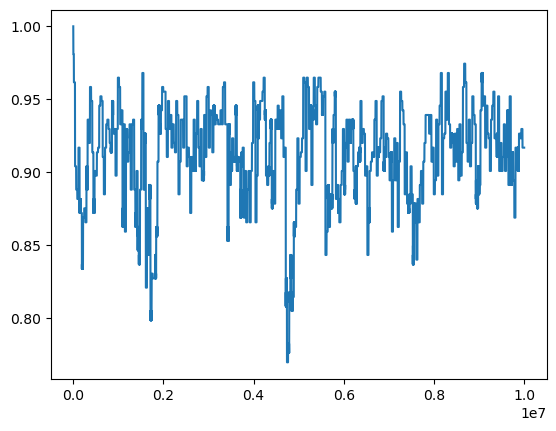

In [31]:
#data = 25_1
data_25_05 = np.loadtxt("25_b.txt")
mc_steps = data_25_1[0:,0]
energies_c = data_25_1[0:,1]
magnetizations_c = data_25_1[0:,2]
plt.plot(mc_steps,magnetizations_c)

In [28]:
#data = 25_0.5
data_25_05 = np.loadtxt("25_b.txt")
mc_steps = data_25_05[0:,0]
energies = data_25_05[0:,1]
magnetizations_b = data_25_05[0:,2]
plt.plot(mc_steps,magnetizations_b)

In [32]:
mc_steps = data_25_15[0:,0]
energies = data_25_15[0:,1]
magnetizations = data_25_15[0:,2]
plt.plot(mc_steps,magnetizations)
plt.plot(mc_steps,magnetizations_b)
plt.plot(mc_steps,magnetizations_c)

##### L = 25

In [4]:
data_25_05 = np.loadtxt("25_b.txt")
data_25_1 = np.loadtxt("25_c.txt")
data_25_15 = np.loadtxt("25_a.txt")

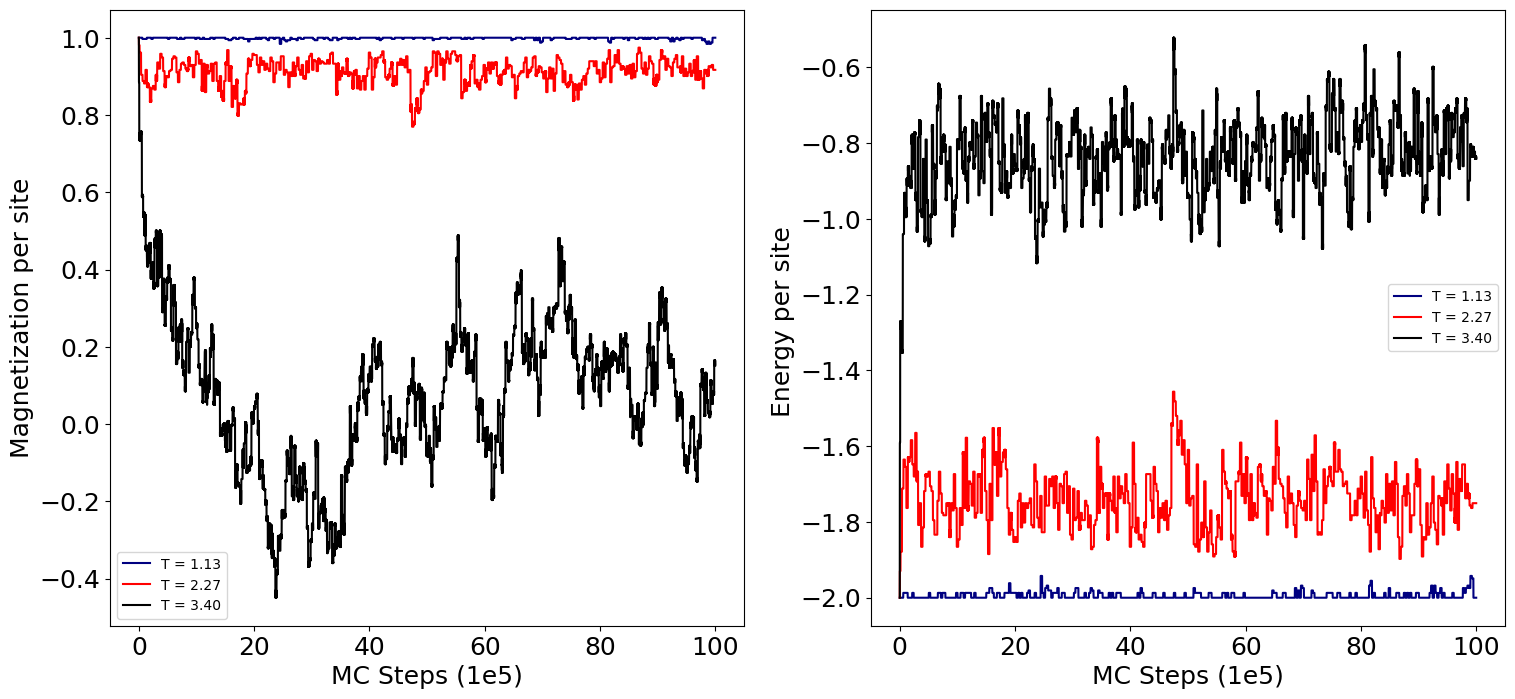

In [33]:
col_map = np.array(["navy", "red", "black"])
T_critic = 2.0/np.log(1.0 + np.sqrt(2.0))
temperatures = np.array([0.5, 1.0, 1.5]) * T_critic
data_list = [data_25_05,data_25_1,data_25_15]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
index_count=0
for T in temperatures:
    data = data_list[index_count]
    mc_steps = data[0:,0]/1e5
    energies = data[0:,1]
    magnetizations = data[0:,2]

    ax1.plot(mc_steps, magnetizations, label='T = {:.2f}'.format(T), c = col_map[index_count])
    ax1.legend(loc = 'best')
    ax2.plot(mc_steps, energies,label='T = {:.2f}'.format(T), c = col_map[index_count])
    ax2.legend(loc = 'center right')
    ax1.set_xlabel("MC Steps (1e5)", fontsize = 18)
    ax2.set_xlabel("MC Steps (1e5)", fontsize = 18)
    ax1.set_ylabel("Magnetization per site", fontsize = 18)
    ax2.set_ylabel("Energy per site ", fontsize = 18)
    ax1.tick_params(axis="x",labelsize=18)
    ax2.tick_params(axis="x",labelsize=18)
    ax1.tick_params(axis="y",labelsize=18)
    ax2.tick_params(axis="y",labelsize=18)
    index_count+=1
plt.show()

##### L = 50

In [3]:
data_50_05 = np.loadtxt("50_b.txt")
data_50_1 = np.loadtxt("50_c.txt")
data_50_15 = np.loadtxt("50_a.txt")

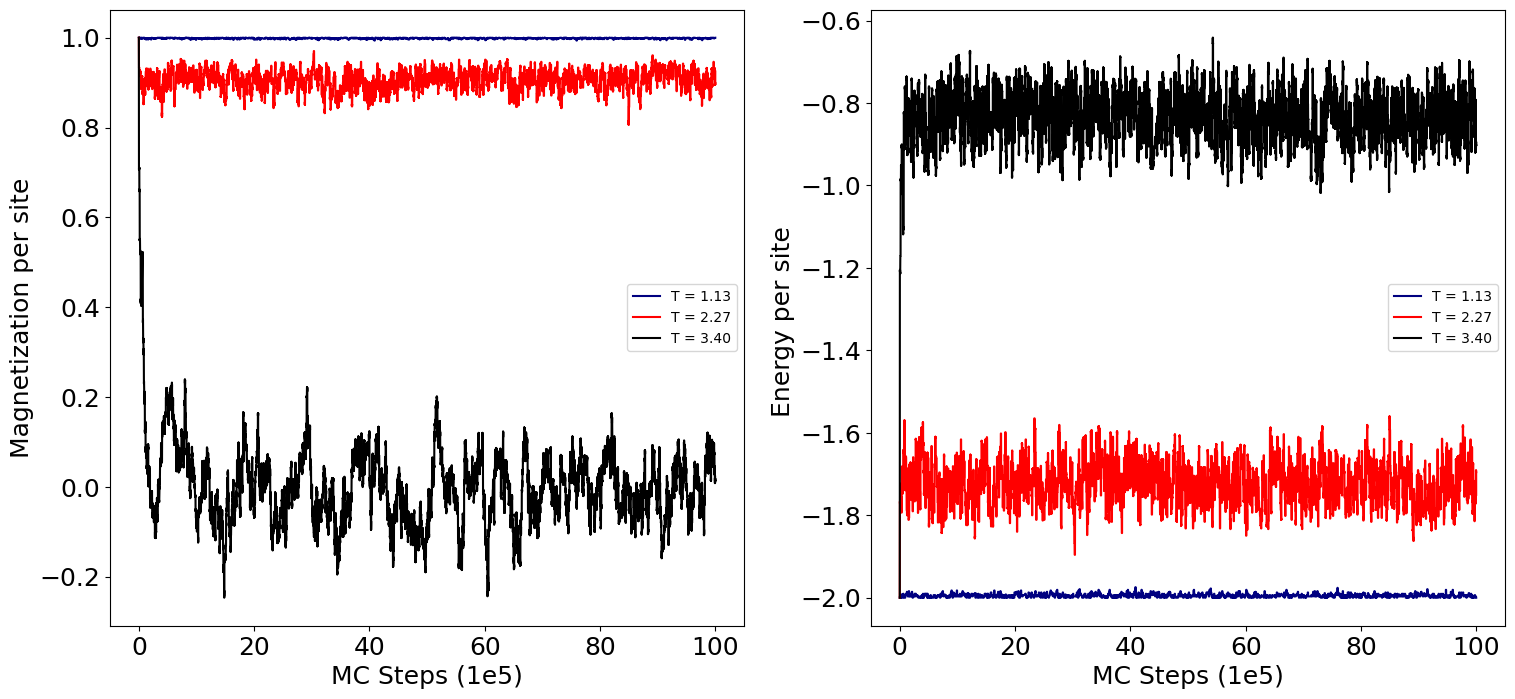

In [35]:
col_map = np.array(["navy", "red", "black"])
T_critic = 2.0/np.log(1.0 + np.sqrt(2.0))
temperatures = np.array([0.5, 1.0, 1.5]) * T_critic
data_list = [data_50_05,data_50_1,data_50_15]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
index_count=0
for T in temperatures:
    data = data_list[index_count]
    mc_steps = data[0:,0]/1e5
    energies = data[0:,1]
    magnetizations = data[0:,2]

    ax1.plot(mc_steps, magnetizations, label='T = {:.2f}'.format(T), c = col_map[index_count])
    ax1.legend(loc = 'best')
    ax2.plot(mc_steps, energies,label='T = {:.2f}'.format(T), c = col_map[index_count])
    ax2.legend(loc = 'center right')
    ax1.set_xlabel("MC Steps (1e5)", fontsize = 18)
    ax2.set_xlabel("MC Steps (1e5)", fontsize = 18)
    ax1.set_ylabel("Magnetization per site", fontsize = 18)
    ax2.set_ylabel("Energy per site ", fontsize = 18)
    ax1.tick_params(axis="x",labelsize=18)
    ax2.tick_params(axis="x",labelsize=18)
    ax1.tick_params(axis="y",labelsize=18)
    ax2.tick_params(axis="y",labelsize=18)
    index_count+=1
plt.show()

##### L = 100

In [2]:
data_100_05 = np.loadtxt("100_b.txt")
data_100_1 = np.loadtxt("100_c.txt")
data_100_15 = np.loadtxt("100_a.txt")

In [22]:
col_map = np.array(["navy", "red", "black"])
T_critic = 2.0/np.log(1.0 + np.sqrt(2.0))
temperatures = np.array([0.5, 1.0, 1.5]) * T_critic
data_list = [data_100_05,data_100_1,data_100_15]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
index_count=0
for T in temperatures:
    data = data_list[index_count]
    mc_steps = data[0:,0]/1e5
    energies = data[0:,1]
    magnetizations = data[0:,2]

    ax1.plot(mc_steps, magnetizations, label='T = {:.2f}'.format(T), c = col_map[index_count])
    ax1.legend(loc = 'best')
    ax2.plot(mc_steps, energies,label='T = {:.2f}'.format(T), c = col_map[index_count])
    ax2.legend(loc = 'center right')
    ax1.set_xlabel("MC Steps (1e5)", fontsize = 18)
    ax2.set_xlabel("MC Steps (1e5)", fontsize = 18)
    ax1.set_ylabel("Magnetization per site", fontsize = 18)
    ax2.set_ylabel("Energy per site ", fontsize = 18)
    ax1.tick_params(axis="x",labelsize=18)
    ax2.tick_params(axis="x",labelsize=18)
    ax1.tick_params(axis="y",labelsize=18)
    ax2.tick_params(axis="y",labelsize=18)
    index_count+=1
plt.show()

## Equilibration time, averages and fluctuations 
After having determined the equilibrium time and disregarding the samples for $t < \tau_{eq}$ estimate the ensemble averages of the magnetisation per spin, the
energy per spin, and the corresponding fluctuations (specific heat and magnetic susceptibility).

| Parameters                        |                                 |
|-----------------------------------|---------------------------------|
| L                                 |   50                            |
| J                                 |   1                             |
| $k_BT$                            |   $ T_c$[0.5, 1, 1.5]           |
| $N_{steps}$                       |   10^7                          |
| $N_{realiz}$                      |   1                             |
| $N_{skip}$                        |   500                           |

In [61]:
T_critic = 2.0/np.log(1.0 + np.sqrt(2.0))
temperatures = np.array([0.5, 1.0, 1.5]) * T_critic
data_list = [data_100_05,data_100_1,data_100_15]
corr_varT_M = []
corr_varT_E = []
num_lag= 500
threshold = 0.0001

for index_count, T in enumerate(temperatures):
    data = data_list[index_count]
    mc_steps = data[0:,0]/1e5
    energies = data[0:,1]
    magnetizations = data[0:,2]
    tmp_m = acf(magnetizations, nlags=num_lag, fft=False)
    tmp_e = acf(energies, nlags=num_lag, fft=False)
    corr_varT_M.append(tmp_m)
    corr_varT_E.append(tmp_e)
    t_eq_m = np.argmax(tmp_m < threshold)
    t_eq_e = np.argmax(tmp_e < threshold)

    print(f"For T = {T}:\n")
    print(f"Equilibration time for energy: {t_eq_m} MC steps")
    print(f"Equilibration time for magnetization: {t_eq_e} MC steps")
    print("------")

For T = 1.134592657106511:

Equilibration time for energy: 13 MC steps
Equilibration time for magnetization: 14 MC steps
------
For T = 2.269185314213022:

Equilibration time for energy: 219 MC steps
Equilibration time for magnetization: 41 MC steps
------
For T = 3.403777971319533:

Equilibration time for energy: 196 MC steps
Equilibration time for magnetization: 57 MC steps
------


In [62]:
#--- Plot-
colors = ["navy", "orange", "green"]

plt.figure(figsize=(20,6))
ax0 = plt.subplot(1,2,1)

for i,x in enumerate(corr_varT_M):
    ax0.plot(x, label='T='+str('%.3f'%temperatures[i]), c = colors[i])

In [52]:
for index_count, T in enumerate(temperatures):
    data = data_list[index_count]
    mc_steps = data[5000:,0]/1e5
    energies = data[5000:,1]
    magnetizations = data[5000:,2]

    E = np.mean(energies)
    M = np.mean(magnetizations)                
    C = (np.std(energies)**2)/(T**2)
    Chi = (np.std(magnetizations)**2)/(T)
    print('T = ',T)
    print(Chi)

T =  1.134592657106511
3.74326642788061e-07
T =  2.269185314213022
0.00015011457333007305
T =  3.403777971319533
0.00049031088613191
